# Domain Data

## Library Import

In [253]:
import numpy as np
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Helper Functions

In [254]:
def get_files(data_dir, prefix):
    return [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith(prefix)]

In [255]:
def create_sample_df(files, domain_label):
    df = pd.DataFrame(columns=["Sample", "Num_genes", "Num_cells", "Domain_label", "Has_spatial"])

    for file in files:
        adata = sc.read_h5ad(file)

        sample = os.path.basename(file).split(".h5ad")[0]
        num_genes = adata.shape[1]
        num_cells = adata.shape[0]
        domain_label = domain_label

        if "spatial" in adata.obsm:
            has_spatial = True
        else:
            has_spatial = False

        new_row = pd.DataFrame([{
            "Sample": sample, 
            "Num_genes": num_genes, 
            "Num_cells": num_cells, 
            "Domain_label": domain_label,
            "Has_spatial": has_spatial
        }])

        df = pd.concat([df, new_row], ignore_index=True)

    df['Num_genes'] = pd.to_numeric(df['Num_genes'], errors='coerce')
    df['Num_cells'] = pd.to_numeric(df['Num_cells'], errors='coerce')
    
    return df

In [256]:
def plot_statistics(df):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    sns.barplot(data=df, x="Sample", hue="Sample", y="Num_genes", ax=axes[0], palette="Blues_d", legend=False)
    axes[0].set_title("Number of Genes per Sample", fontsize=14)
    axes[0].set_xlabel("Sample", fontsize=12)
    axes[0].set_ylabel("Number of Genes", fontsize=12)
    axes[0].tick_params(axis='x', labelsize=8)

    sns.barplot(data=df, x="Sample", hue="Sample", y="Num_cells", ax=axes[1], palette="Greens_d", legend=False)
    axes[1].set_title("Number of Cells per Sample", fontsize=14)
    axes[1].set_xlabel("Sample", fontsize=12)
    axes[1].set_ylabel("Number of Cells", fontsize=12)
    axes[1].tick_params(axis='x', labelsize=8)

    plt.tight_layout()
    plt.show()

## Dataset 1 - MERFISH small

In [257]:
files = get_files("../data/domain/raw_123", "MERFISH_small")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("small")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/MERFISH_small1.h5ad', '../data/domain/raw_123/MERFISH_small2.h5ad', '../data/domain/raw_123/MERFISH_small3.h5ad', '../data/domain/raw_123/MERFISH_small4.h5ad', '../data/domain/raw_123/MERFISH_small5.h5ad']


In [260]:
df_mf = create_sample_df(files, "domain")
df_mf

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,MERFISH_small1,155,5488,domain,True
1,MERFISH_small2,155,5557,domain,True
2,MERFISH_small3,155,5926,domain,True
3,MERFISH_small4,155,5803,domain,True
4,MERFISH_small5,155,5543,domain,True


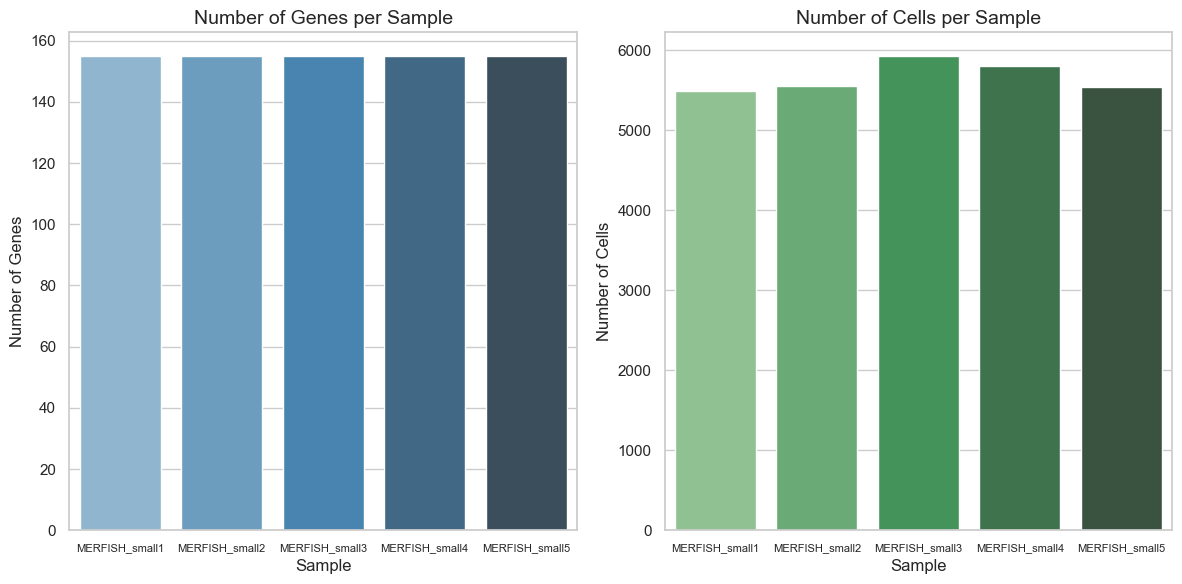

In [261]:
plot_statistics(df_mf)

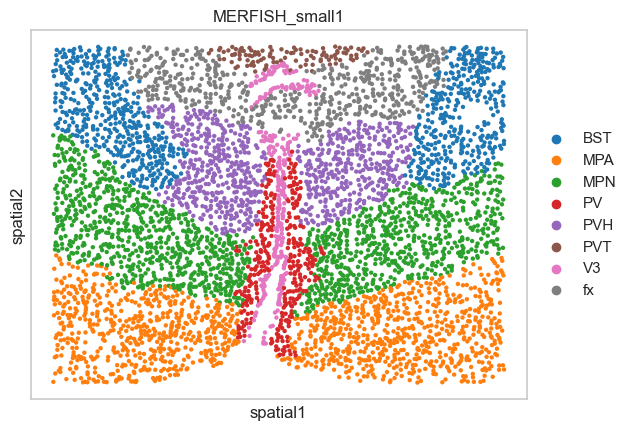

In [262]:
adata = sc.read_h5ad(files[0])
domain_label = df_mf["Domain_label"][0]
title = df_mf["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=40, title=title)

## Dataset 2 - STARmap

In [263]:
files = get_files("../data/domain/raw_123", "STARmap")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("STARmap")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/STARmap1.h5ad', '../data/domain/raw_123/STARmap2.h5ad', '../data/domain/raw_123/STARmap3.h5ad', '../data/domain/raw_123/STARmap4.h5ad']


In [264]:
df_sm = create_sample_df(files, "region")
df_sm

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,STARmap1,1020,1207,region,True
1,STARmap2,166,1049,region,True
2,STARmap3,166,1053,region,True
3,STARmap4,166,1088,region,True


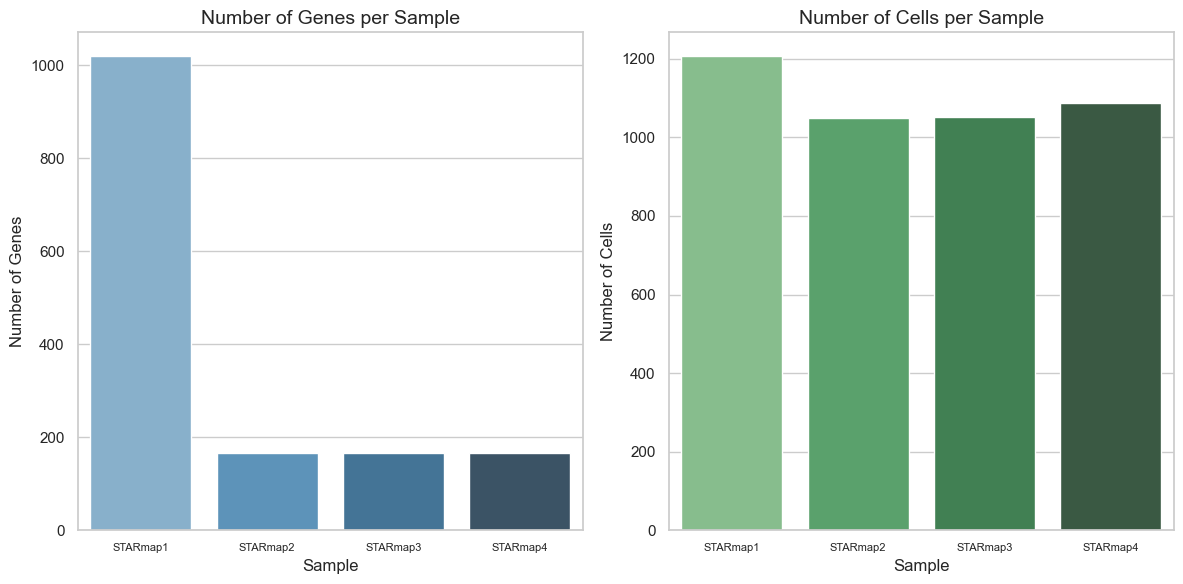

In [265]:
plot_statistics(df_sm)

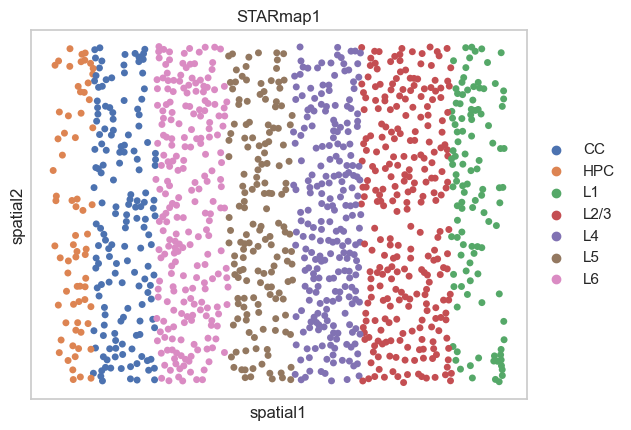

In [266]:
adata = sc.read_h5ad(files[0])
domain_label = df_sm["Domain_label"][0]
title = df_sm["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=100, title=title)

## Dataset 3 - BaristaSeq

In [267]:
files = get_files("../data/domain/raw_123", "BaristaSeq")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("BaristaSeq")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/BaristaSeq1.h5ad', '../data/domain/raw_123/BaristaSeq2.h5ad', '../data/domain/raw_123/BaristaSeq3.h5ad']


In [268]:
df_bs = create_sample_df(files, "layer")
df_bs

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,BaristaSeq1,79,1525,layer,True
1,BaristaSeq2,79,2042,layer,True
2,BaristaSeq3,79,1690,layer,True


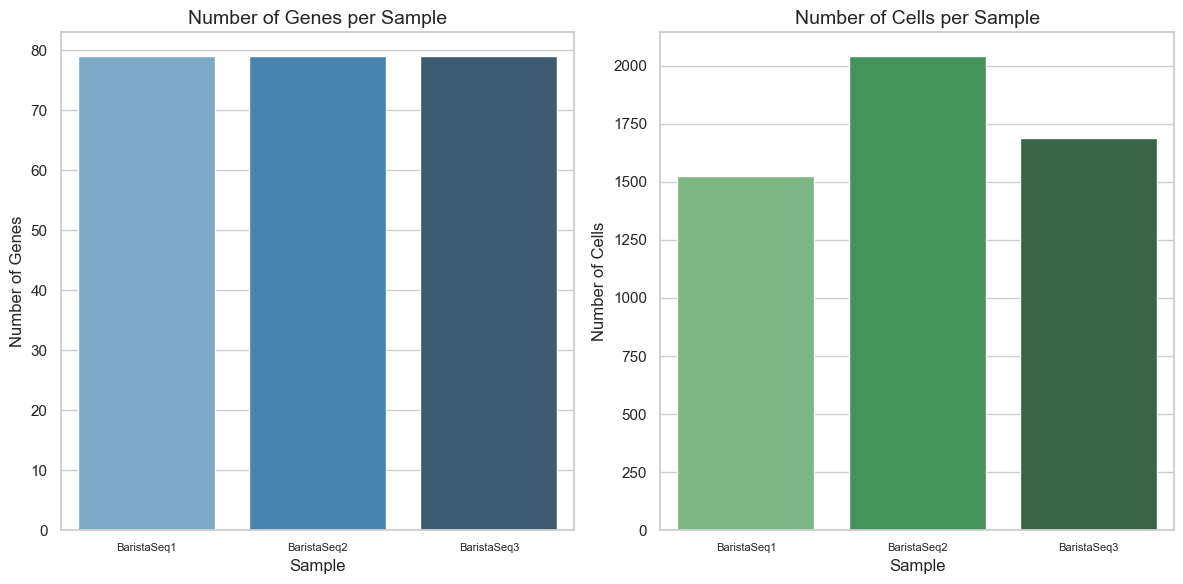

In [269]:
plot_statistics(df_bs)

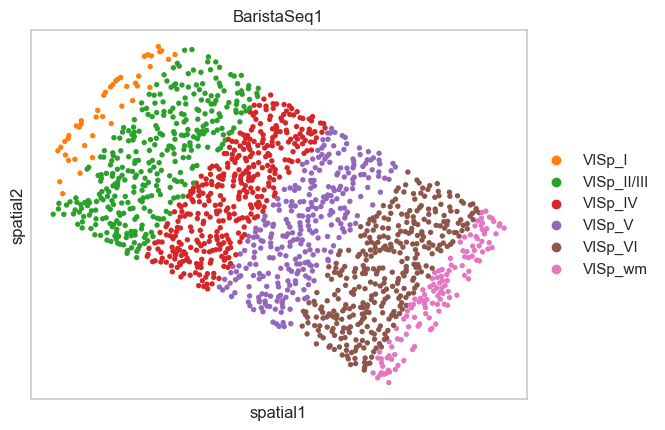

In [270]:
adata = sc.read_h5ad(files[0])
domain_label = df_bs["Domain_label"][0]
title = df_bs["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=60, title=title)

## Dataset 7.1 - MERFISH Zhuang 1

In [271]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-1")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-1.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-1.010.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.011.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.012.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.013.h5ad']
129


In [272]:
df_z1 = create_sample_df(files, "parcellation_division")
df_z1

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-1.010,1122,8027,parcellation_division,True
1,Zhuang-ABCA-1.011,1122,7596,parcellation_division,True
2,Zhuang-ABCA-1.012,1122,8040,parcellation_division,True
3,Zhuang-ABCA-1.013,1122,10266,parcellation_division,True
4,Zhuang-ABCA-1.014,1122,11088,parcellation_division,True
...,...,...,...,...,...
124,Zhuang-ABCA-1.137,1122,15937,parcellation_division,True
125,Zhuang-ABCA-1.138,1122,16409,parcellation_division,True
126,Zhuang-ABCA-1.139,1122,15375,parcellation_division,True
127,Zhuang-ABCA-1.140,1122,11578,parcellation_division,True


In [273]:
df_z1.describe()

,Num_genes,Num_cells
count,129.0,129.000000
mean,1122.0,20281.612403
std,0.0,7627.601430
min,1122.0,7024.000000
25%,1122.0,12304.000000
50%,1122.0,20795.000000
75%,1122.0,26699.000000
max,1122.0,36636.000000


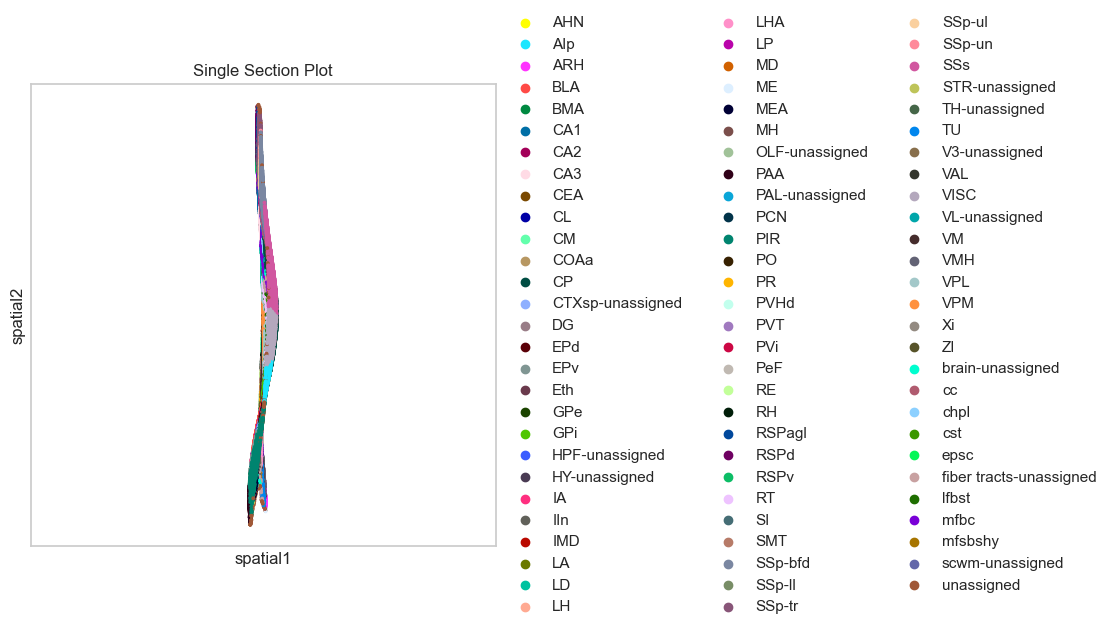

In [303]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-1.079.h5ad")
color_key = "parcellation_structure"  # Key in adata.obs for coloring

fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.embedding(
    adata,
    basis="spatial",  # Use the 'spatial' basis
    color=color_key,  # Color by the desired key
    size=30,          # Adjust point size
    ax=ax,            # Use the custom subplot
    show=False        # Prevent immediate display
)

ax.set_ylim(11, 0)  # Flip the y-axis
ax.set_xlim(0, 11)  # Set x-axis limits
ax.axis("equal")    # Ensure equal aspect ratio
ax.set_xticks([])   # Remove x-axis ticks
ax.set_yticks([])   # Remove y-axis ticks
ax.set_title("Single Section Plot")  # Add a title

# Show the plot
plt.show()

## Dataset 7.2 - MERFISH Zhuang 2

In [280]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-2")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-2.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-2.004.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.005.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.006.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.007.h5ad']
54


In [281]:
df_z2 = create_sample_df(files, "parcellation_division")
df_z2.head(10)

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-2.004,1122,9751,parcellation_division,True
1,Zhuang-ABCA-2.005,1122,10883,parcellation_division,True
2,Zhuang-ABCA-2.006,1122,12505,parcellation_division,True
3,Zhuang-ABCA-2.007,1122,11548,parcellation_division,True
4,Zhuang-ABCA-2.008,1122,9118,parcellation_division,True
5,Zhuang-ABCA-2.009,1122,12384,parcellation_division,True
6,Zhuang-ABCA-2.010,1122,10801,parcellation_division,True
7,Zhuang-ABCA-2.011,1122,11528,parcellation_division,True
8,Zhuang-ABCA-2.012,1122,8539,parcellation_division,True
9,Zhuang-ABCA-2.013,1122,6640,parcellation_division,True


In [282]:
df_z2.describe()

,Num_genes,Num_cells
count,54.0,54.000000
mean,1122.0,19565.185185
std,0.0,8157.015642
min,1122.0,6640.000000
25%,1122.0,12410.750000
50%,1122.0,19962.000000
75%,1122.0,26442.000000
max,1122.0,35960.000000


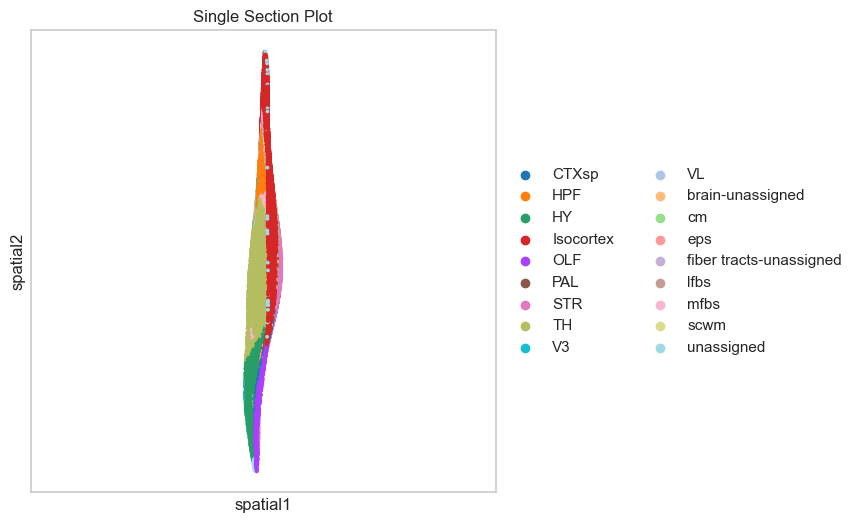

In [283]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-2.037.h5ad")
color_key = "parcellation_division"  # Key in adata.obs for coloring

fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.embedding(
    adata,
    basis="spatial",  # Use the 'spatial' basis
    color=color_key,  # Color by the desired key
    size=30,          # Adjust point size
    ax=ax,            # Use the custom subplot
    show=False        # Prevent immediate display
)

ax.set_ylim(11, 0)  # Flip the y-axis
ax.set_xlim(0, 11)  # Set x-axis limits
ax.axis("equal")    # Ensure equal aspect ratio
ax.set_xticks([])   # Remove x-axis ticks
ax.set_yticks([])   # Remove y-axis ticks
ax.set_title("Single Section Plot")  # Add a title

# Show the plot
plt.show()

## Dataset 7.3 - MERFISH Zhuang 3

In [288]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-3")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-3.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-3.001.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.002.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.003.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.004.h5ad']
22


In [289]:
df_z3 = create_sample_df(files, "parcellation_division")
df_z3.head(10)

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-3.001,1122,84464,parcellation_division,True
1,Zhuang-ABCA-3.002,1122,98855,parcellation_division,True
2,Zhuang-ABCA-3.003,1122,109773,parcellation_division,True
3,Zhuang-ABCA-3.004,1122,116179,parcellation_division,True
4,Zhuang-ABCA-3.005,1122,116196,parcellation_division,True
5,Zhuang-ABCA-3.006,1122,97994,parcellation_division,True
6,Zhuang-ABCA-3.007,1122,103520,parcellation_division,True
7,Zhuang-ABCA-3.008,1122,91443,parcellation_division,True
8,Zhuang-ABCA-3.009,1122,80593,parcellation_division,True
9,Zhuang-ABCA-3.010,1122,81464,parcellation_division,True


In [290]:
df_z3.describe()

,Num_genes,Num_cells
count,22.0,22.000000
mean,1122.0,71220.090909
std,0.0,31885.208030
min,1122.0,14260.000000
25%,1122.0,44283.000000
50%,1122.0,78604.000000
75%,1122.0,96356.250000
max,1122.0,116196.000000


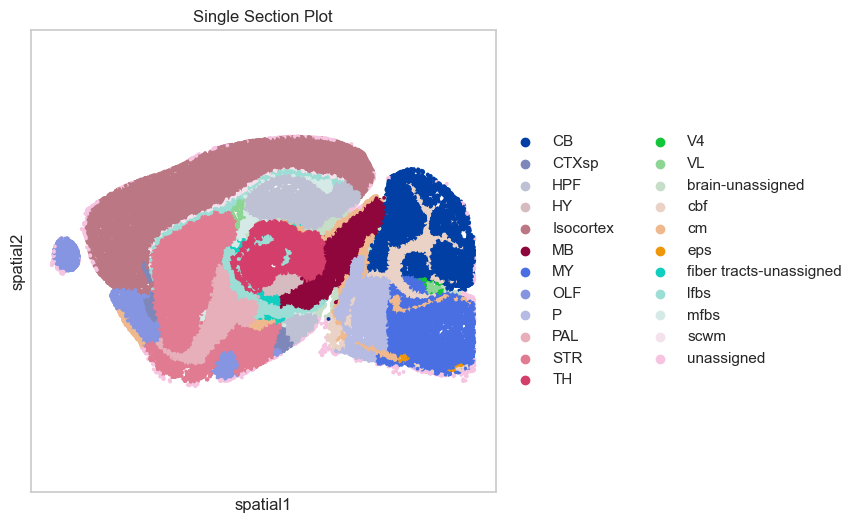

In [291]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-3.010.h5ad")
color_key = "parcellation_division"  # Key in adata.obs for coloring

fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.embedding(
    adata,
    basis="spatial",  # Use the 'spatial' basis
    color=color_key,  # Color by the desired key
    size=30,          # Adjust point size
    ax=ax,            # Use the custom subplot
    show=False        # Prevent immediate display
)

ax.set_ylim(11, 0)  # Flip the y-axis
ax.set_xlim(0, 11)  # Set x-axis limits
ax.axis("equal")    # Ensure equal aspect ratio
ax.set_xticks([])   # Remove x-axis ticks
ax.set_yticks([])   # Remove y-axis ticks
ax.set_title("Single Section Plot")  # Add a title

# Show the plot
plt.show()

## Dataset 7.4 - MERFISH Zhuang 4

In [186]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-4")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-4.")[1].split(".")[0]))
print(files)

['../data/domain/raw_7/Zhuang-ABCA-4.001.h5ad', '../data/domain/raw_7/Zhuang-ABCA-4.002.h5ad', '../data/domain/raw_7/Zhuang-ABCA-4.003.h5ad']


In [188]:
df = create_sample_df(files, "parcellation_division")
df

,Sample,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-4.001,1122,32311,parcellation_division,True
1,Zhuang-ABCA-4.002,1122,50053,parcellation_division,True
2,Zhuang-ABCA-4.003,1122,79997,parcellation_division,True


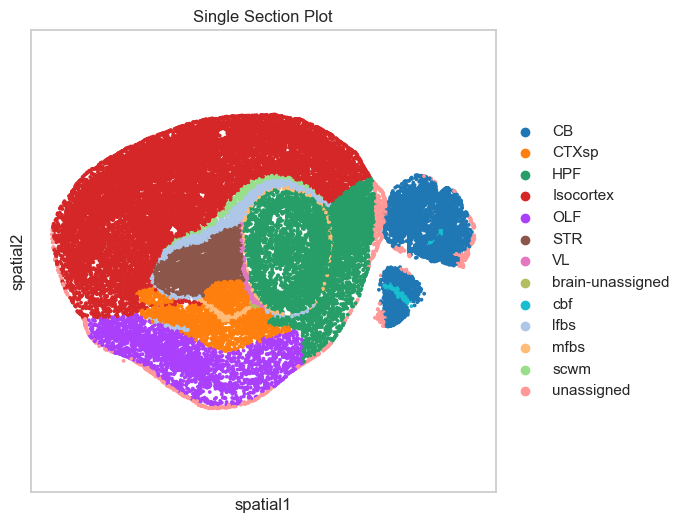

In [292]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-4.002.h5ad")
color_key = "parcellation_division"  # Key in adata.obs for coloring

fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.embedding(
    adata,
    basis="spatial",  # Use the 'spatial' basis
    color=color_key,  # Color by the desired key
    size=30,          # Adjust point size
    ax=ax,            # Use the custom subplot
    show=False        # Prevent immediate display
)

ax.set_ylim(11, 0)  # Flip the y-axis
ax.set_xlim(0, 11)  # Set x-axis limits
ax.axis("equal")    # Ensure equal aspect ratio
ax.set_xticks([])   # Remove x-axis ticks
ax.set_yticks([])   # Remove y-axis ticks
ax.set_title("Single Section Plot")  # Add a title

# Show the plot
plt.show()